### Unit 6 | Assignment - What's the Weather Like? 

    Open Weather Map API: https://openweathermap.org/api

In [2]:
from random import *
import random
import json
import requests
import csv
from pprint import pprint
from config import api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import datetime

In [3]:
# Establish full range of lon & lat coordinates
lon_samp = np.arange(-180,181,.5)
lat_samp = np.arange(-90,91,.25)

# Create loops that pick 500 random numbers from each list
lon_list1 = sample(set(lon_samp), 720)
lat_list1 = sample(set(lat_samp), 720)
lon_list2 = sample(set(lon_samp), 720)
lat_list2 = sample(set(lat_samp), 720)
lon_list3 = sample(set(lon_samp), 720)
lat_list3 = sample(set(lat_samp), 720)
lon_list4 = sample(set(lon_samp), 720)
lat_list4 = sample(set(lat_samp), 720)
lon_list5 = sample(set(lon_samp), 720)
lat_list5 = sample(set(lat_samp), 720)
lon_list6 = sample(set(lon_samp), 720)
lat_list6 = sample(set(lat_samp), 720)

In [8]:
# Create dataframes
citidf1 = pd.DataFrame()
citidf1['lon_est'] = lon_list1
citidf1['lat_est'] = lat_list1

citidf2 = pd.DataFrame()
citidf2['lon_est'] = lon_list2
citidf2['lat_est'] = lat_list2

citidf3 = pd.DataFrame()
citidf3['lon_est'] = lon_list3
citidf3['lat_est'] = lat_list3

citidf4 = pd.DataFrame()
citidf4['lon_est'] = lon_list4
citidf4['lat_est'] = lat_list4

citidf5 = pd.DataFrame()
citidf5['lon_est'] = lon_list5
citidf5['lat_est'] = lat_list5

citidf6 = pd.DataFrame()
citidf6['lon_est'] = lon_list6
citidf6['lat_est'] = lat_list6

# Combine dataframes
citidf = pd.concat([citidf1, citidf2, citidf3, citidf4, citidf5, citidf6])

# Combine lon and lat into coordinates
citidf['coordinates'] = citidf[['lon_est', 'lat_est']].apply(tuple, axis=1)
citidf.head()

,lon_est,lat_est,coordinates
0,-43.0,-74.75,"(-43.0, -74.75)"
1,-1.5,-79.50,"(-1.5, -79.5)"
2,79.5,-2.25,"(79.5, -2.25)"
3,155.5,-8.00,"(155.5, -8.0)"
4,-29.5,-48.00,"(-29.5, -48.0)"


In [9]:
len(citidf)

4320

In [10]:
# Use citipy to generate a list of cities
cities = []
name = []
country = []

for coordinate_pair in citidf['coordinates']:
    lon, lat = coordinate_pair
    cities.append(citipy.nearest_city(lon, lat))

for city in cities:
    country.append(city.country_code)
    name.append(city.city_name)
    #print(city.city_name)
    #print(f"The country code of {name} is '{country_code}'.")

citidf['city_name'] = name
citidf['country_code'] = country

citidf.head()

,lon_est,lat_est,coordinates,city_name,country_code
0,-43.0,-74.75,"(-43.0, -74.75)",castro,cl
1,-1.5,-79.50,"(-1.5, -79.5)",ventanas,ec
2,79.5,-2.25,"(79.5, -2.25)",barentsburg,sj
3,155.5,-8.00,"(155.5, -8.0)",barentsburg,sj
4,-29.5,-48.00,"(-29.5, -48.0)",laguna,br


In [11]:
len(citidf)

4320

In [13]:
# Drop duplicate cities and print to see if we have at least 500 unique values
citi_df = citidf.drop_duplicates(["city_name"], keep=False)
len(citi_df)

582

In [14]:
# Create a miniDF for testing 
miniDF = citi_df[0:20]
miniDF.head()

,lon_est,lat_est,coordinates,city_name,country_code
1,-1.5,-79.5,"(-1.5, -79.5)",ventanas,ec
7,-34.5,-57.0,"(-34.5, -57.0)",nueva helvecia,uy
8,14.0,76.5,"(14.0, 76.5)",hiriyur,in
10,65.5,82.0,"(65.5, 82.0)",krasnoselkup,ru
13,13.0,36.5,"(13.0, 36.5)",doka,sd


#### Sample API response:

    {"coord":{"lon":139,"lat":35},
    "sys":{"country":"JP","sunrise":1369769524,"sunset":1369821049},
    "weather":[{"id":804,"main":"clouds","description":"overcast clouds","icon":"04n"}],
    "main":{"temp":289.5,"humidity":89,"pressure":1013,"temp_min":287.04,"temp_max":292.04},
    "wind":{"speed":7.31,"deg":187.002},
    "rain":{"3h":0},
    "clouds":{"all":92},
    "dt":1369824698,
    "id":1851632,
    "name":"Shuzenji",
    "cod":200}

In [15]:
# Prepare API call
base_url = "https://api.openweathermap.org/data/2.5/weather"
params = {"appid":api_key, "units":"imperial", "type":"like"}

In [16]:
# Create dataframe and series to hold final results
df = pd.DataFrame()
df['id'] = ""
df['city'] = ""
df['country'] = ""
df['lon'] = ""
df['lat'] = ""
df['date'] = ""
df['temperature'] = ""
df['humidity'] = ""
df['cloudiness'] = ""
df['wind speed'] = ""

In [17]:
# 
city_json = []
city_count = 0

for index, row in citi_df.iterrows():
    city_name = row['city_name']            # search the city_name in each row
    params['q'] = city_name                 # add city_name as keyword to params dictionary (q is per api documentation)

    response = requests.get(base_url, params=params)   # send api request
    print(f"Retrieving information for city #{city_count}: {params['q']}")
    print(response.url)                                # print response url 
    response_json = response.json()                    # convert response to json
    # print(json.dumps(response_json))
 
    try:
        df.at[index,'id'] = response_json['id']
        df.at[index,'city'] = response_json['name']
        df.at[index,'country'] = response_json['sys']['country']
        df.at[index,'lon'] = response_json['coord']['lon']
        df.at[index,'lat'] = response_json['coord']['lat']
        df.at[index,'date'] = response_json['dt']
        df.at[index,'temperature'] = response_json['main']['temp']
        df.at[index,'humidity'] = response_json['main']['humidity']
        df.at[index,'cloudiness'] = response_json['clouds']['all']
        df.at[index,'wind speed'] = response_json['wind']['speed']

        city_count = city_count + 1
        print(f"#{city_count} - {city_name} has been added to df")
    
    except (KeyError, IndexError):
        continue

    if city_count == 500: 
        break

Retrieving information for city #0: ventanas
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=ventanas
#1 - ventanas has been added to df
Retrieving information for city #1: nueva helvecia
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=nueva+helvecia
#2 - nueva helvecia has been added to df
Retrieving information for city #2: hiriyur
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=hiriyur
#3 - hiriyur has been added to df
Retrieving information for city #3: krasnoselkup
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=krasnoselkup
Retrieving information for city #3: doka
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=doka
#4 - doka has been added to df
Retrievin

Retrieving information for city #37: thinadhoo
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=thinadhoo
#38 - thinadhoo has been added to df
Retrieving information for city #38: batticaloa
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=batticaloa
#39 - batticaloa has been added to df
Retrieving information for city #39: carballo
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=carballo
#40 - carballo has been added to df
Retrieving information for city #40: salinopolis
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=salinopolis
#41 - salinopolis has been added to df
Retrieving information for city #41: bria
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=bria
#

Retrieving information for city #74: sotouboua
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=sotouboua
#75 - sotouboua has been added to df
Retrieving information for city #75: cumberland
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=cumberland
#76 - cumberland has been added to df
Retrieving information for city #76: lafiagi
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=lafiagi
#77 - lafiagi has been added to df
Retrieving information for city #77: colares
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=colares
#78 - colares has been added to df
Retrieving information for city #78: constanza
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=constanza
#79 - 

Retrieving information for city #111: kayes
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=kayes
#112 - kayes has been added to df
Retrieving information for city #112: marica
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=marica
#113 - marica has been added to df
Retrieving information for city #113: port-cartier
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=port-cartier
#114 - port-cartier has been added to df
Retrieving information for city #114: westerland
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=westerland
#115 - westerland has been added to df
Retrieving information for city #115: muisne
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=muisne
#11

Retrieving information for city #149: bara
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=bara
#150 - bara has been added to df
Retrieving information for city #150: axixa do tocantins
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=axixa+do+tocantins
Retrieving information for city #150: garowe
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=garowe
#151 - garowe has been added to df
Retrieving information for city #151: gelemso
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=gelemso
#152 - gelemso has been added to df
Retrieving information for city #152: mamontovo
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=mamontovo
#153 - mamontovo has been added to df


Retrieving information for city #183: truro
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=truro
#184 - truro has been added to df
Retrieving information for city #184: dunmore town
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=dunmore+town
#185 - dunmore town has been added to df
Retrieving information for city #185: achisay
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=achisay
Retrieving information for city #185: stepnogorsk
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=stepnogorsk
#186 - stepnogorsk has been added to df
Retrieving information for city #186: fria
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=fria
#187 - fria has been added to df
Retr

Retrieving information for city #221: rocha
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=rocha
#222 - rocha has been added to df
Retrieving information for city #222: mastic beach
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=mastic+beach
#223 - mastic beach has been added to df
Retrieving information for city #223: sarai
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=sarai
#224 - sarai has been added to df
Retrieving information for city #224: kolyshley
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=kolyshley
#225 - kolyshley has been added to df
Retrieving information for city #225: hvolsvollur
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=hvolsvollur

Retrieving information for city #258: fairhope
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=fairhope
#259 - fairhope has been added to df
Retrieving information for city #259: bababe
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=bababe
Retrieving information for city #259: rafaela
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=rafaela
#260 - rafaela has been added to df
Retrieving information for city #260: liwale
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=liwale
#261 - liwale has been added to df
Retrieving information for city #261: koson
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=koson
#262 - koson has been added to df
Retrieving information f

Retrieving information for city #292: pizarro
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=pizarro
#293 - pizarro has been added to df
Retrieving information for city #293: mecca
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=mecca
#294 - mecca has been added to df
Retrieving information for city #294: dabat
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=dabat
#295 - dabat has been added to df
Retrieving information for city #295: panama city
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=panama+city
#296 - panama city has been added to df
Retrieving information for city #296: opobo
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=opobo
Retrieving informati

Retrieving information for city #329: willowmore
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=willowmore
#330 - willowmore has been added to df
Retrieving information for city #330: gambela
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=gambela
#331 - gambela has been added to df
Retrieving information for city #331: pitimbu
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=pitimbu
#332 - pitimbu has been added to df
Retrieving information for city #332: lawrenceburg
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=lawrenceburg
#333 - lawrenceburg has been added to df
Retrieving information for city #333: clarksburg
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like

Retrieving information for city #365: bella union
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=bella+union
#366 - bella union has been added to df
Retrieving information for city #366: eufaula
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=eufaula
#367 - eufaula has been added to df
Retrieving information for city #367: urdzhar
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=urdzhar
Retrieving information for city #367: viru
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=viru
#368 - viru has been added to df
Retrieving information for city #368: yarmouth
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=yarmouth
#369 - yarmouth has been added to df
Retrieving

Retrieving information for city #403: venado tuerto
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=venado+tuerto
#404 - venado tuerto has been added to df
Retrieving information for city #404: romodanovo
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=romodanovo
#405 - romodanovo has been added to df
Retrieving information for city #405: mettur
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=mettur
#406 - mettur has been added to df
Retrieving information for city #406: aranos
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=aranos
#407 - aranos has been added to df
Retrieving information for city #407: chone
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=chone

Retrieving information for city #439: solano
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=solano
#440 - solano has been added to df
Retrieving information for city #440: kongolo
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=kongolo
#441 - kongolo has been added to df
Retrieving information for city #441: barra do garcas
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=barra+do+garcas
#442 - barra do garcas has been added to df
Retrieving information for city #442: waw
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=waw
Retrieving information for city #442: sao benedito do rio preto
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=sao+benedito+do+rio+preto
#44

Retrieving information for city #474: duisburg
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=duisburg
#475 - duisburg has been added to df
Retrieving information for city #475: bombay
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=bombay
#476 - bombay has been added to df
Retrieving information for city #476: bom jardim
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=bom+jardim
#477 - bom jardim has been added to df
Retrieving information for city #477: little current
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=like&q=little+current
#478 - little current has been added to df
Retrieving information for city #478: mayumba
https://api.openweathermap.org/data/2.5/weather?appid=f60742b2784a10349f691adcfe4c61a2&units=imperial&type=l

In [18]:
# Convert unix timestamps to datetime
for row in df['date']:
    df['date'] = datetime.datetime.utcfromtimestamp(row)

In [19]:
df.head()

,id,city,country,lon,lat,date,temperature,humidity,cloudiness,wind speed
1,3868621,Ventanas,CL,-71.48,-32.74,2018-04-03 17:00:00,66.13,68,0,8.05
7,2332459,Lagos,NG,3.39,6.46,2018-04-03 17:00:00,85.07,73,0,10.87
8,1270032,Hiriyur,IN,76.62,13.94,2018-04-03 17:00:00,67.34,91,0,5.39
13,376332,Doka,SD,35.76,13.52,2018-04-03 17:00:00,80.84,28,0,7.52
14,1259638,Pindwara,IN,73.05,24.79,2018-04-03 17:00:00,67.61,49,0,3.6


In [20]:
# Export dataframe to CSV
df.to_csv("weatherPy2.csv")

### WeatherPy Plots

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [21]:
def pproperties(x_label, y_label, x_lim):
    plt.title(f"{y_label} vs {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x_lim)
    plt.grid(True)

In [22]:
df.head()

,id,city,country,lon,lat,date,temperature,humidity,cloudiness,wind speed
1,3868621,Ventanas,CL,-71.48,-32.74,2018-04-03 17:00:00,66.13,68,0,8.05
7,2332459,Lagos,NG,3.39,6.46,2018-04-03 17:00:00,85.07,73,0,10.87
8,1270032,Hiriyur,IN,76.62,13.94,2018-04-03 17:00:00,67.34,91,0,5.39
13,376332,Doka,SD,35.76,13.52,2018-04-03 17:00:00,80.84,28,0,7.52
14,1259638,Pindwara,IN,73.05,24.79,2018-04-03 17:00:00,67.61,49,0,3.6


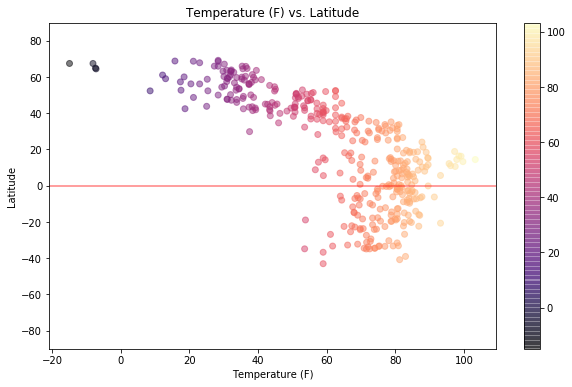

In [84]:
# increase plot size
plt.rcParams["figure.figsize"]=[10,6]

#ax = plt.axes()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(ylim=(-90,90),
      xlabel='Temperature (F)',
      ylabel='Latitude',
      title='Temperature (F) vs. Latitude');

plt.axhline(0, color='red', alpha=0.5)
plt.scatter(df['temperature'], df['lat'], alpha=0.5, c=df['temperature'], cmap='magma')
plt.colorbar()
plt.savefig('1_temp.png')


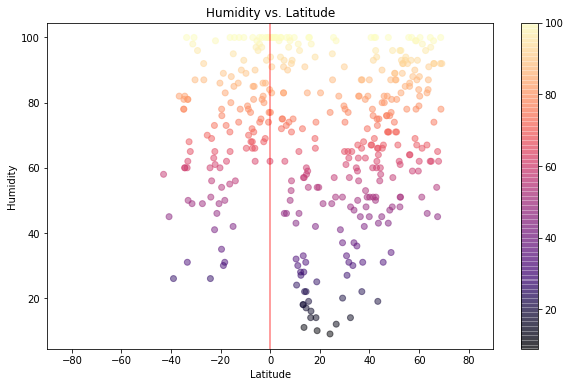

In [86]:
# increase plot size
plt.rcParams["figure.figsize"]=[10,6]

#ax = plt.axes()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=(-90,90),
      xlabel='Latitude',
      ylabel='Humidity',
      title='Humidity vs. Latitude');

plt.axvline(0, color='red', alpha=0.5)
plt.scatter(df['lat'], df['humidity'], alpha=0.5, c=df['humidity'], cmap='magma')
plt.colorbar()
plt.savefig('2-humidity.png')

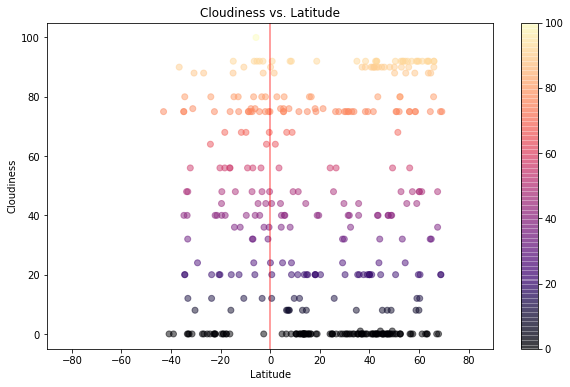

In [87]:
# increase plot size
plt.rcParams["figure.figsize"]=[10,6]

#ax = plt.axes()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=(-90,90),
      xlabel='Latitude',
      ylabel='Cloudiness',
      title='Cloudiness vs. Latitude');

plt.axvline(0, color='red', alpha=0.5)
plt.scatter(df['lat'], df['cloudiness'], alpha=0.5, c=df['cloudiness'], cmap='magma')
plt.colorbar()
plt.savefig('3_cloudiness.png')

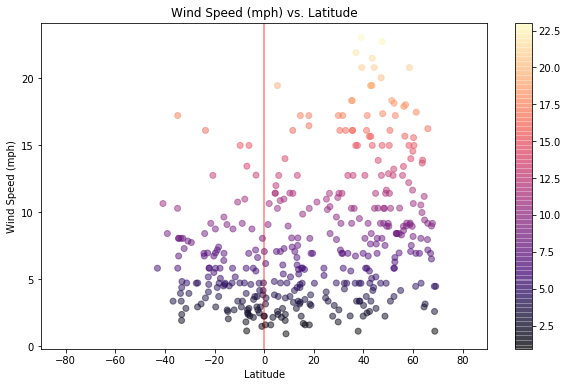

In [88]:
# increase plot size
plt.rcParams["figure.figsize"]=[10,6]

#ax = plt.axes()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=(-90,90),
      xlabel='Latitude',
      ylabel='Wind Speed (mph)',
      title='Wind Speed (mph) vs. Latitude');

plt.axvline(0, color='red', alpha=0.5)
plt.scatter(df['lat'], df['wind speed'], alpha=0.5, c=df['wind speed'], cmap='magma')
plt.colorbar()
plt.savefig('4_wind.png')

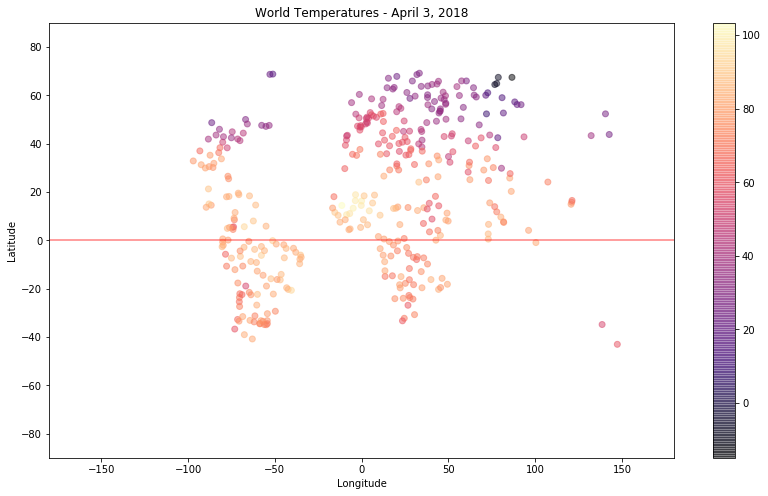

In [89]:
# increase plot size
plt.rcParams["figure.figsize"]=[14,8]

#ax = plt.axes()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(ylim=(-90,90),
       xlim=(-180,180),
      xlabel='Longitude',
      ylabel='Latitude',
      title='World Temperatures - April 3, 2018');

plt.axhline(0, color='red', alpha=0.5)
plt.scatter(df['lon'], df['lat'], alpha=0.5, c=df['temperature'], cmap='magma')
plt.colorbar()
plt.savefig('5_world.png')

**Observations:**
* There is a clear correlation between temperature and latitude. You can see that temperatures increase as you approach the equator.
* Based on the limited data available, it appears that it was wind speeds were higher in the cities towards the north on this day in April.
* There's no clear correlation between latitude and cloudiness/humidity based on this small subset of data on this one particular day, however, humidity would be higher in tropically-situated cities near water.